In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# first a tf.Tensor
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

In [4]:
# construct a tf.Session to execute the graph
sess = tf.Session()
result = sess.run(x)

In [5]:
result

array([-3.        , -2.8064516 , -2.612903  , -2.419355  , -2.2258065 ,
       -2.032258  , -1.8387097 , -1.6451614 , -1.451613  , -1.2580645 ,
       -1.0645162 , -0.87096786, -0.6774194 , -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.6774192 ,
        0.8709676 ,  1.0645161 ,  1.2580643 ,  1.451613  ,  1.6451612 ,
        1.8387094 ,  2.032258  ,  2.2258062 ,  2.4193544 ,  2.612903  ,
        2.8064513 ,  3.        ], dtype=float32)

In [7]:
x.eval(session = sess)
#x.eval()

array([-3.        , -2.8064516 , -2.612903  , -2.419355  , -2.2258065 ,
       -2.032258  , -1.8387097 , -1.6451614 , -1.451613  , -1.2580645 ,
       -1.0645162 , -0.87096786, -0.6774194 , -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.6774192 ,
        0.8709676 ,  1.0645161 ,  1.2580643 ,  1.451613  ,  1.6451612 ,
        1.8387094 ,  2.032258  ,  2.2258062 ,  2.4193544 ,  2.612903  ,
        2.8064513 ,  3.        ], dtype=float32)

In [8]:
sess.close()

In [9]:
sess = tf.InteractiveSession()

In [10]:
x.eval()

array([-3.        , -2.8064516 , -2.612903  , -2.419355  , -2.2258065 ,
       -2.032258  , -1.8387097 , -1.6451614 , -1.451613  , -1.2580645 ,
       -1.0645162 , -0.87096786, -0.6774194 , -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.6774192 ,
        0.8709676 ,  1.0645161 ,  1.2580643 ,  1.451613  ,  1.6451612 ,
        1.8387094 ,  2.032258  ,  2.2258062 ,  2.4193544 ,  2.612903  ,
        2.8064513 ,  3.        ], dtype=float32)

In [11]:
# Now a tf.Operation; we'll use our values from [-3,3] to create Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.negative(tf.pow(x-mean, 2.0)/(2.0 * tf.pow(sigma, 2.0))))*
    (1.0/(sigma*tf.sqrt(2.0*3.1415))))
assert z.graph is tf.get_default_graph()

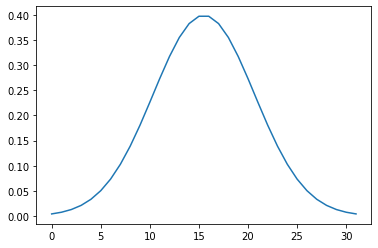

In [12]:
# execute the graph and plot the result
plt.plot(z.eval())

In [13]:
# we can find out the shape of a tensor like so
print(z.get_shape())

(32,)


In [14]:
#or in a more friendly format
print(z.get_shape().as_list())


[32]


In [15]:
# sometimes we may not know the shape of a tensor until it is computed in the graph.
# In that case we should use the tf.shpae function
# which will return a tensor which can be evaluated, rather than a discrete value of tf.Dimension
print(tf.shape(z).eval())

[32]


In [16]:
# we can combine tensors like so
print(tf.stack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [18]:
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

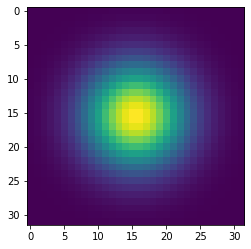

In [19]:
plt.imshow(z_2d.eval())

In [27]:
# for function let's create a gabor patch
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x,y), z_2d)
plt.imshow(z.eval());

ValueError: Shape must be rank 2 but is rank 1 for 'MatMul_4' (op: 'MatMul') with input shapes: [32], [1,32].